# **DATA230 : Term Project**

https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset?select=shopping_behavior_updated.csv

The Consumer Behavior and Shopping Habits Dataset is a valuable resource for businesses looking to understand the nuances of consumer decision-making. This dataset contains a wide range of information, including demographic data, purchase history, product preferences, and shopping channels (online or offline). By analyzing this data, businesses can optimize their marketing strategies, improve their offerings, and enhance customer satisfaction. This ultimately leads to increased sales and customer loyalty.

In [59]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [60]:
data = pd.read_csv('/content/shopping_behavior_updated.csv')
data.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


**As there are no NUll values**
**There is no much EDA process**

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [62]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [63]:
data.columns.tolist()

['Customer ID',
 'Age',
 'Gender',
 'Item Purchased',
 'Category',
 'Purchase Amount (USD)',
 'Location',
 'Size',
 'Color',
 'Season',
 'Review Rating',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Previous Purchases',
 'Payment Method',
 'Frequency of Purchases']

In [64]:
data.isnull().sum().to_dict()

{'Customer ID': 0,
 'Age': 0,
 'Gender': 0,
 'Item Purchased': 0,
 'Category': 0,
 'Purchase Amount (USD)': 0,
 'Location': 0,
 'Size': 0,
 'Color': 0,
 'Season': 0,
 'Review Rating': 0,
 'Subscription Status': 0,
 'Shipping Type': 0,
 'Discount Applied': 0,
 'Promo Code Used': 0,
 'Previous Purchases': 0,
 'Payment Method': 0,
 'Frequency of Purchases': 0}

In [65]:
data.dtypes.to_dict()

{'Customer ID': dtype('int64'),
 'Age': dtype('int64'),
 'Gender': dtype('O'),
 'Item Purchased': dtype('O'),
 'Category': dtype('O'),
 'Purchase Amount (USD)': dtype('int64'),
 'Location': dtype('O'),
 'Size': dtype('O'),
 'Color': dtype('O'),
 'Season': dtype('O'),
 'Review Rating': dtype('float64'),
 'Subscription Status': dtype('O'),
 'Shipping Type': dtype('O'),
 'Discount Applied': dtype('O'),
 'Promo Code Used': dtype('O'),
 'Previous Purchases': dtype('int64'),
 'Payment Method': dtype('O'),
 'Frequency of Purchases': dtype('O')}

In [66]:
data.shape[1]

18

In [67]:
data.shape[0]

3900

# **DATA VISUALIZATION**

**1. GEOGRAPHICAL MAP**

<ipython-input-68-4b277ace8bd9>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query('continent == "North America" and name == "United States of America"')


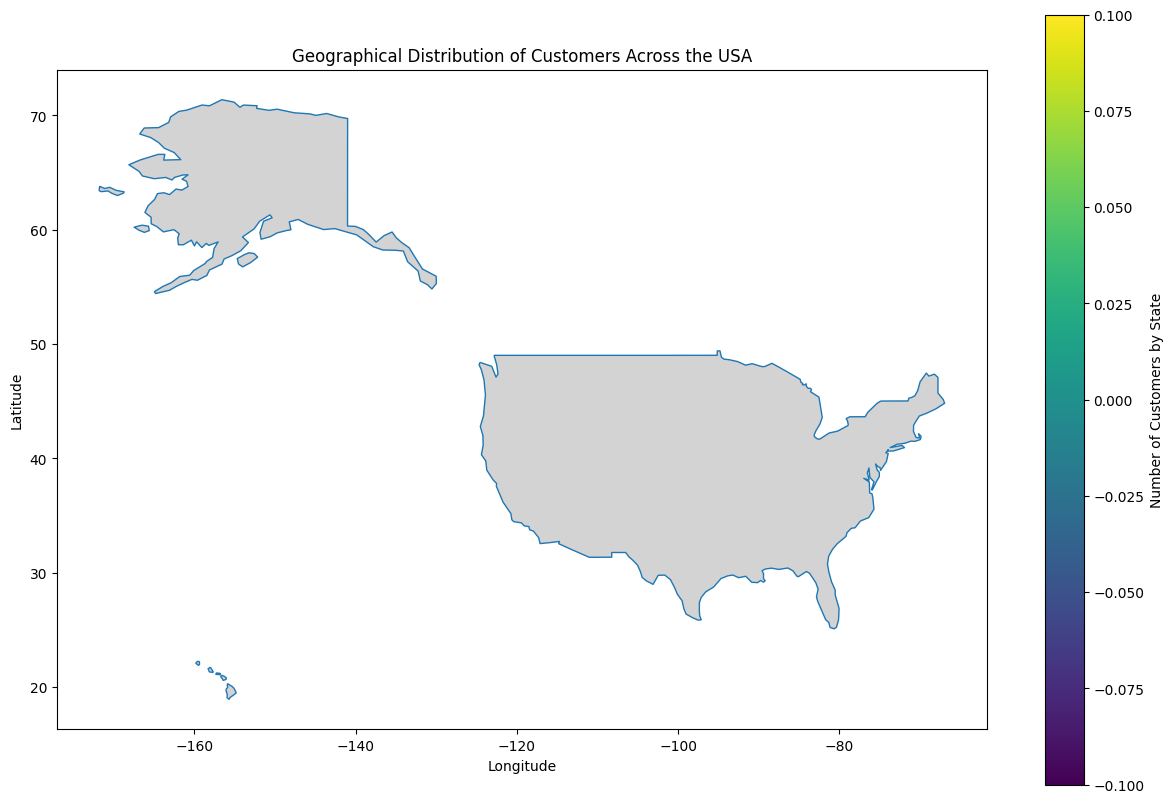

In [68]:
# Load a map of the United States
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query('continent == "North America" and name == "United States of America"')

# Count the number of customers in each location
location_counts = data['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Count']

# Merge this with the geopandas dataframe for the USA
# Assuming the 'Location' field contains state names
usa = usa.merge(location_counts, how='left', left_on='name', right_on='Location')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
usa.boundary.plot(ax=ax, linewidth=1)
usa.plot(column='Count', ax=ax, legend=True, legend_kwds={'label': "Number of Customers by State"},
         cmap='viridis', missing_kwds={'color': 'lightgrey'})

plt.title('Geographical Distribution of Customers Across the USA')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**2. LINE GRAPH**

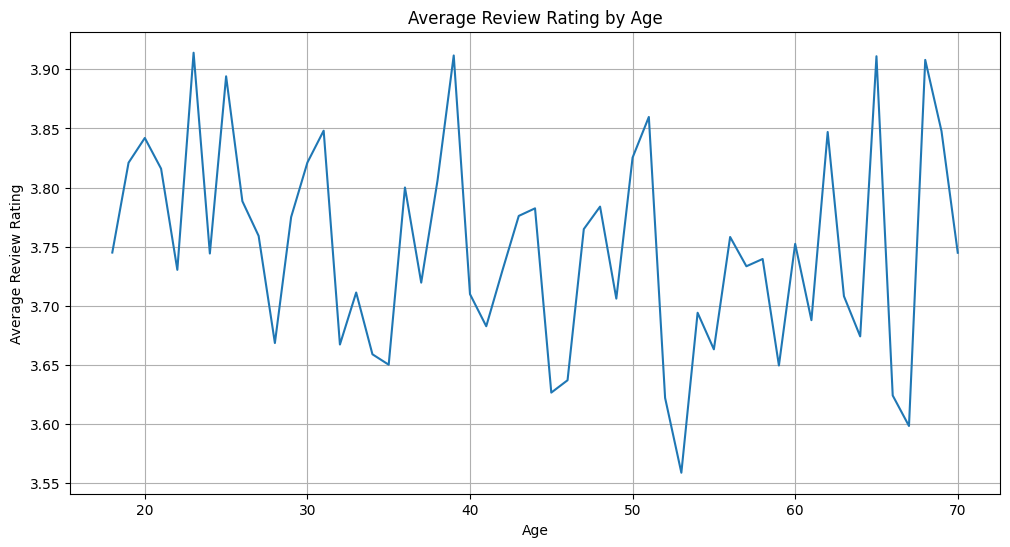

In [69]:
# Grouping the data by 'Age' and calculating the average 'Review Rating' for each age group
age_rating = data.groupby('Age')['Review Rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_rating, x='Age', y='Review Rating')
plt.title('Average Review Rating by Age')
plt.xlabel('Age')
plt.ylabel('Average Review Rating')
plt.grid(True)
plt.show()

**3. PIE CHART**

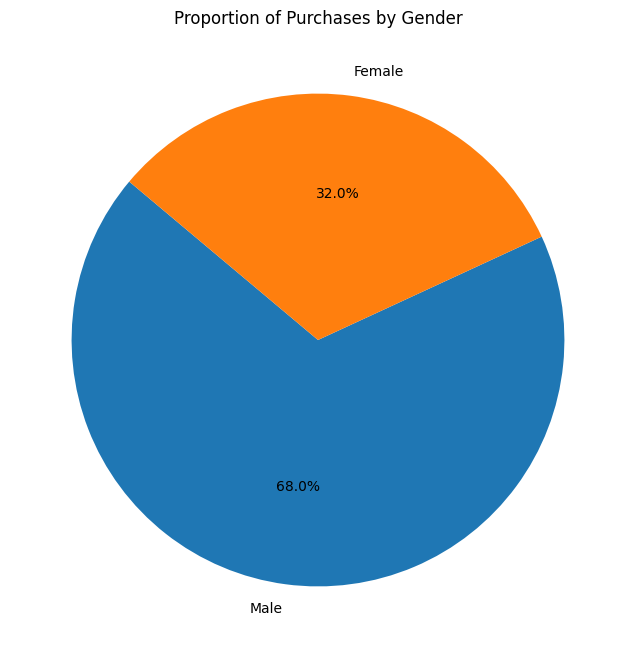

In [70]:
# Counting the number of occurrences of each gender
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Purchases by Gender')
plt.show()


**4. BAR GRAPH**

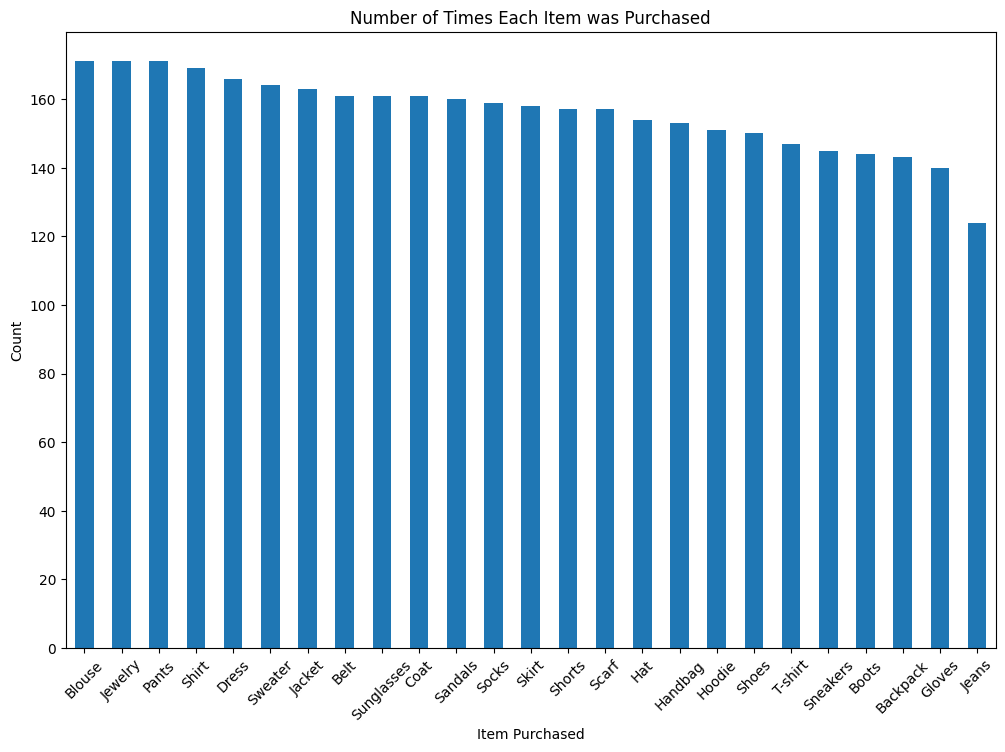

In [71]:
# Counting the number of occurrences of each item
item_counts = data['Item Purchased'].value_counts()
plt.figure(figsize=(12, 8))
item_counts.plot(kind='bar')
plt.title('Number of Times Each Item was Purchased')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**5.DONUT GRAPH**

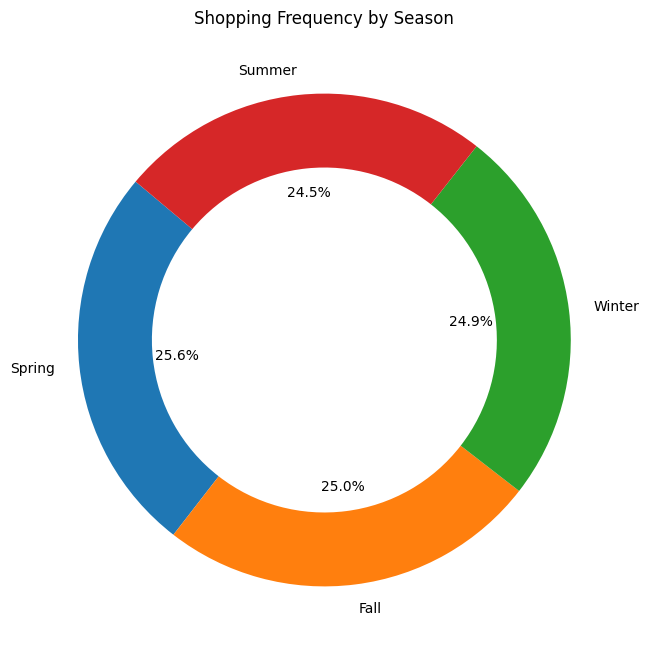

In [72]:
# Counting the number of purchases in each season
season_counts = data['Season'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Shopping Frequency by Season')
plt.show()


**6.BOX PLOT**

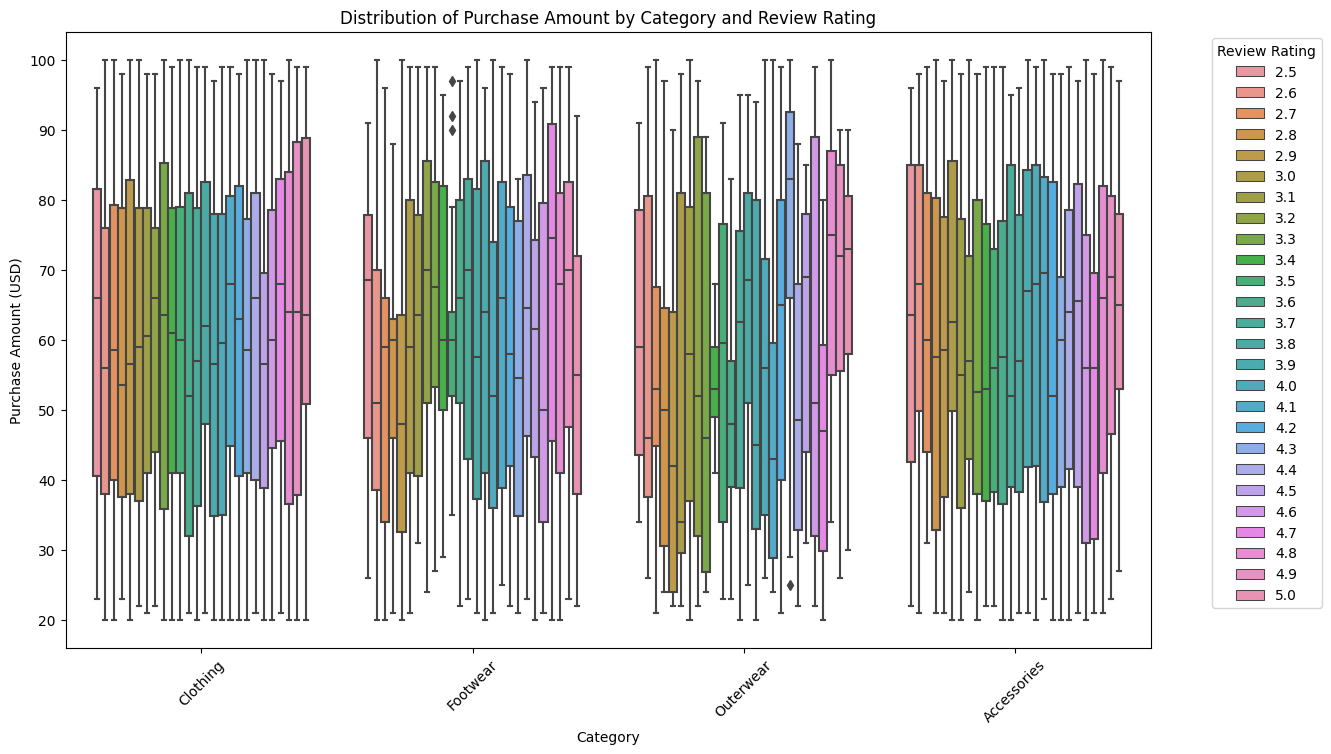

In [75]:
# Creating a boxplot to show the distribution of 'Purchase Amount (USD)' across different 'Categories',
# colored by the average 'Review Rating' for each category
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=data, hue='Review Rating')
plt.title('Distribution of Purchase Amount by Category and Review Rating')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Review Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


**7. HEAT MAP**

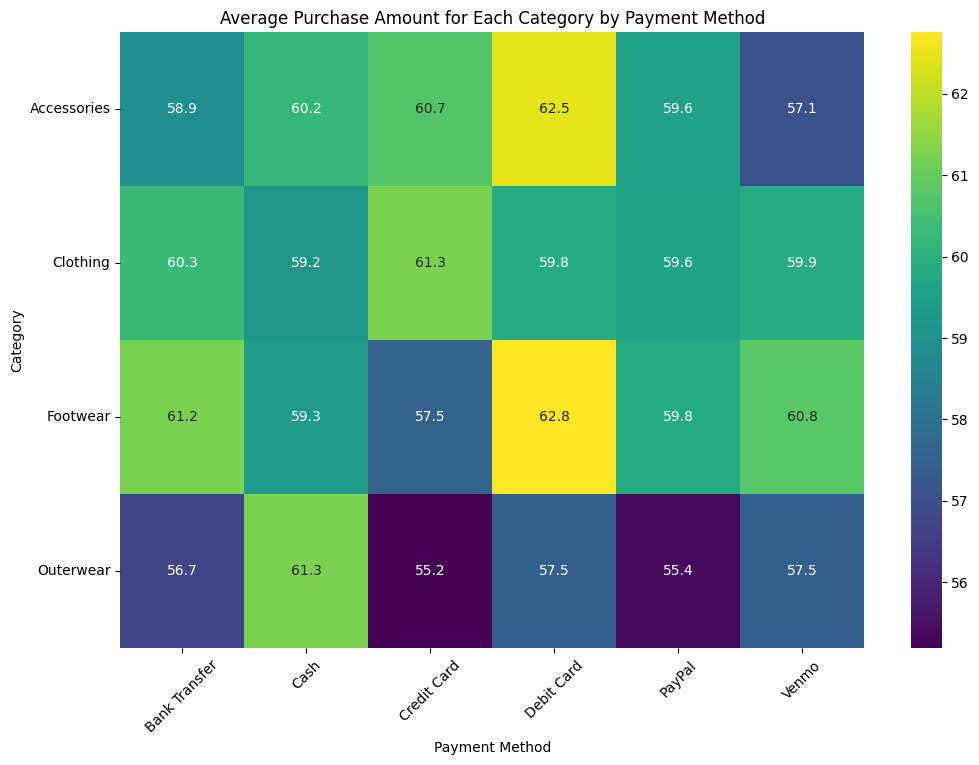

In [76]:
# Calculating the average purchase amount for each combination of 'Category' and 'Payment Method'
category_payment_avg = data.groupby(['Category', 'Payment Method'])['Purchase Amount (USD)'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(category_payment_avg, annot=True, cmap='viridis', fmt=".1f")
plt.title('Average Purchase Amount for Each Category by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
